<a href="https://colab.research.google.com/github/KPoornima/English-Character-Recognition/blob/KPoornima-patch-1/English_Letter_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import keras
import tensorflow
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras.optimizers import Adam, SGD, RMSprop 
from keras import backend

Using TensorFlow backend.


In [0]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/A_Z Handwritten Data.csv')

In [0]:
X=data.iloc[:,0:784]
Y=data.iloc[:,0]

In [0]:
#Y[1]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=1)

In [0]:
#Y[100000].shape

In [0]:
#y_train[789].shape

In [0]:
#y_train[78900]

In [0]:
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
standard_scaler.fit(x_train)

x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
x_train=x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')
x_test=x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')

In [0]:
#y_train[78900]

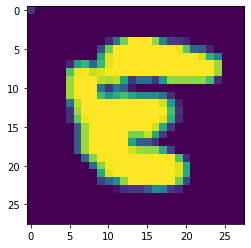

In [15]:
plt.imshow(np.array(x_train[789]).reshape(28,28))

In [0]:
#y_train[14800]

In [0]:
#x_test[789]

In [0]:
#y_train[789]

In [0]:
num_classes=26
y_train=np_utils.to_categorical(y_train, num_classes=26)
y_test=np_utils.to_categorical(y_test, num_classes=26)

In [0]:
#y_train[789]

In [0]:
#x_train.shape

In [0]:
model=Sequential()
model.add(Conv2D(32,(5,5),strides=(1,1), padding='valid',activation='relu'))
model.add(Conv2D(32,(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(32,(5,5),strides=(1,1), padding='valid',activation='relu'))
model.add(Conv2D(32,(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(26, activation='softmax'))

In [27]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=512, epochs=15)

Train on 297960 samples, validate on 74490 samples
Epoch 1/15
297960/297960 [==============================] - 686s 2ms/step - loss: 0.0937 - acc: 0.9728 - val_loss: 0.0715 - val_acc: 0.9800
Epoch 2/15
290816/297960 [============================>.] - ETA: 15s - loss: 0.0774 - acc: 0.9775

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel=('Loss')
plt.xlabel=('Epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [0]:
scores=model.evaluate(x_test,y_test,verbose=0)

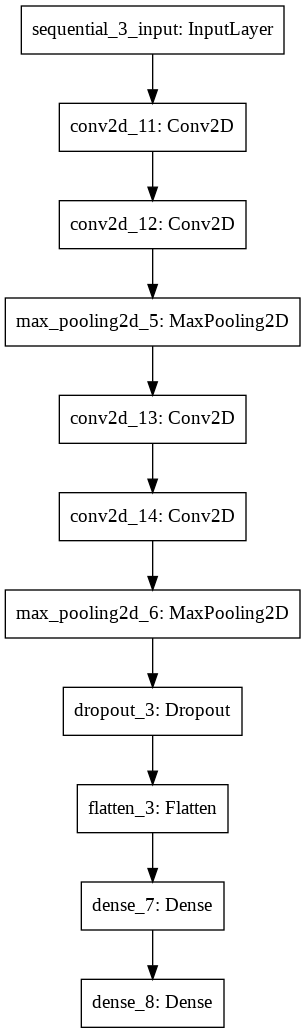

In [31]:
plot_model(model,to_file="model.png")

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 32)         